# Quiz 4

In [45]:
import numpy as np 
from scipy import stats
import seaborn as sns
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##  Question 1
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [33]:
n_stress = 67
n = 100
prop = 0.75

In [35]:
#data = np.concatenate((np.ones((n_stress)), np.zeros((n - n_stress))), axis=None)
F_H0 = stats.binom(n, prop)

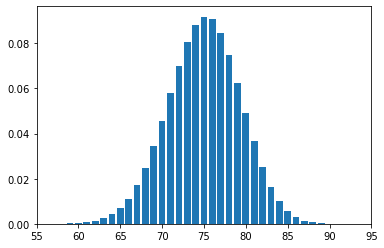

In [39]:
x = np.linspace(0,100, 101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(55, 95) 
pylab.show()

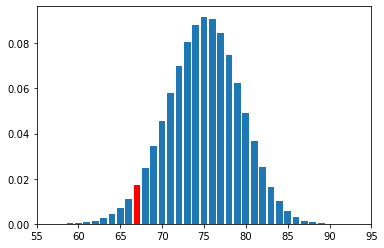

In [40]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(67,100,5), F_H0.pmf(np.linspace(67,100,5)), align = 'center', color='red')
xlim(55, 95)
pylab.show()

In [44]:
print("Достигаемый уровень значимости %.4f" % (stats.binom_test(67, 100, prop))) #, alternative = 'greater')))

Достигаемый уровень значимости 0.0822


## Question 3
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точк

In [53]:
df = pd.read_csv('pines.txt', sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sn      584 non-null    float64
 1   we      584 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


<Figure size 2160x2160 with 0 Axes>

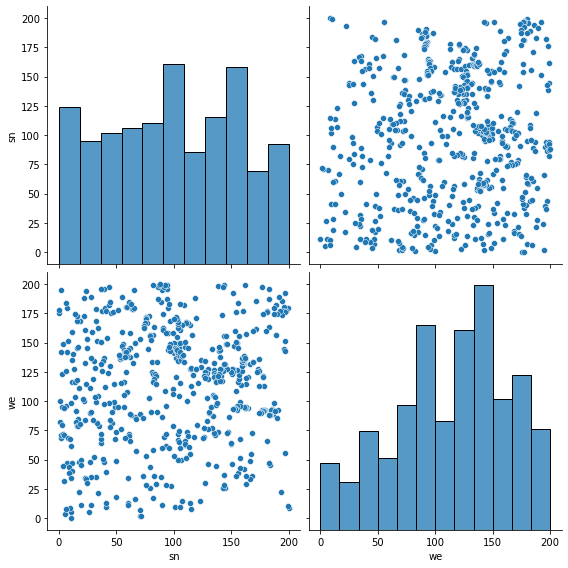

<Figure size 2160x2160 with 0 Axes>

In [72]:
sns.pairplot(df, diag_kind="hist",  height=4)

In [73]:
sn_num, we_num = 5, 5

pines_binned = stats.binned_statistic_2d(x=df.sn, y=df.we, values=None, statistic='count', bins=[sn_num, we_num])

In [81]:
pines_binned.statistic

Cреднее ожидаемое количество сосен в каждом квадрате [[18. 26. 29. 25. 20.]
 [14. 12. 22. 34. 25.]
 [12. 24. 15. 50. 37.]
 [ 8. 19. 31. 50.  7.]
 [ 7.  8. 37. 27. 27.]]


In [83]:
print("Cреднее ожидаемое количество сосен в каждом квадрате", np.sum(pines_binned.statistic) / (sn_num * we_num)*0.01)

Cреднее ожидаемое количество сосен в каждом квадрате 0.2336


## Question 4
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [79]:
stats.chisquare(pines_binned.statistic.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)